In [20]:
import time
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave

%reload_ext autoreload
%autoreload 2

from kymographs import KymoSpider

Populating the interactive namespace from numpy and matplotlib


# Loading data
_Note:_ The example below loads multiple exportet stacks and concatenates them. At the end the only variable that need to be set to something meaningful have to be `stack`, `seg`, and `flow`. The data for these variables you can generate as can be seen in `TimeLapseData2d` at the very bottom. (This was true when I wrote this text... ;)

In [21]:
# folder = '/Users/markslabodnick/Dropbox/Bobseg/Results/20170428/export/'
folder = '/Users/jug/Repositories/GIT/BobSeg/export/'


stack1 = imread(folder+'stack01.tiff')
stack1 = np.swapaxes(stack1,0,1)
# stack2 = imread(folder+'stack02.tiff')
# stack2 = np.swapaxes(stack2,0,1)
# stack = np.concatenate([stack1,stack2],axis=1)
stack = stack1

seg1 = imread(folder+'seg01.tiff')
# seg2 = imread(folder+'seg02.tiff')
# seg = np.concatenate([seg1,seg2])
seg = seg1

flow1 = imread(folder+'flow01.tiff')
flow1 = np.swapaxes(flow1,0,1)
# flow2 = imread(folder+'flow02.tiff')
# flow2 = np.swapaxes(flow2,0,1)
# flow = np.concatenate([flow1,flow2],axis=1)
flow = flow1

# Create the KymoSpider object

In [31]:
# Parameters are (default number of legs is 8): 
# -- leg length in pixels
# -- (x,y)-tuple defining the kymo spider's center point in the image
# -- optional parameter rotation in degrees (convention: make leg 1 point towards the Ea/Ep interface!)
ks = KymoSpider(90,(185,265),rotation=160)
#ks.set_leg_number(5, rotation=45)
ks.set_leg_angles([15,75,125,180,225,310])

### Check if the created spider is placed sinsibly
_Note:_ you will be shown the first and the last loaded frame AND the whole thing will only work if the spider does fit within the image entirely!

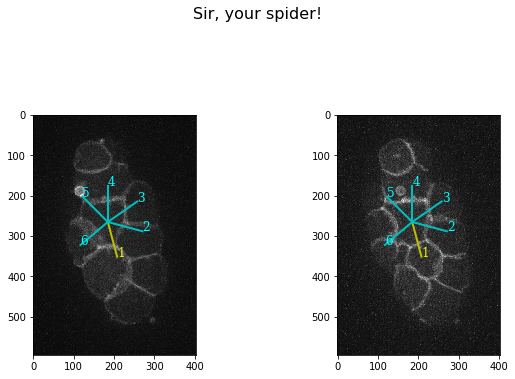

In [32]:
pylab.rcParams['figure.figsize'] = (10, 15)
fig = plt.figure()
ks.plot_spider_loc_on_images(fig,stack[1],flow)

# Compute Kymographs and Plot Data

[37, 41, 41, 42, 40, 40, 40, 40, 40, 41, 40, 40, 41, 42, 42, 43, 44, 44, 44, 45, 45, 45, 45, 47, 47, 46, 46, 48, 47, 48, 48, 47, 47, 47, 47, 46, 46, 46, 47, 47, 47, 46, 47, 48, 49, 49, 47, 47, 47, 47]
37
36.542959006
35.9020284414
35.1800254621
36.4453409781
35.4194670625
39.4343168107
37.9458096913
39.8410525351
37.6628693628
40.3289479177
37.8828784774
41.582470842
45.7433367805
46.2825949311
45.118409163
37.5386112792
38.1814321154
37.1603483426
33.2223330005
30.6577880687
27.7663390491
32.4277660961
30.3769307658
33.3240841298
31.3830041709
30.5783594211
28.6194543017
32.3843528834
32.8371486839
31.0149838759
29.4127360154
32.1320345622
34.1474690551
30.3456815514
33.3454752202
30.1841841106
31.6971884253
37.3145763177
38.357211129
41.0919666692
40.9601445382
42.8579135713
44.0619108139
47.0363562993
45.5884094679
45.9572190477
47.157716384
46.213954339
[37, 41, 41, 42, 40, 40, 40, 40, 40, 41, 40, 40, 41, 42, 42, 43, 44, 44, 44, 45, 45, 45, 45, 47, 47, 46, 46, 48, 47, 48, 48, 47, 4

IndexError: index 51 is out of bounds for axis 1 with size 50

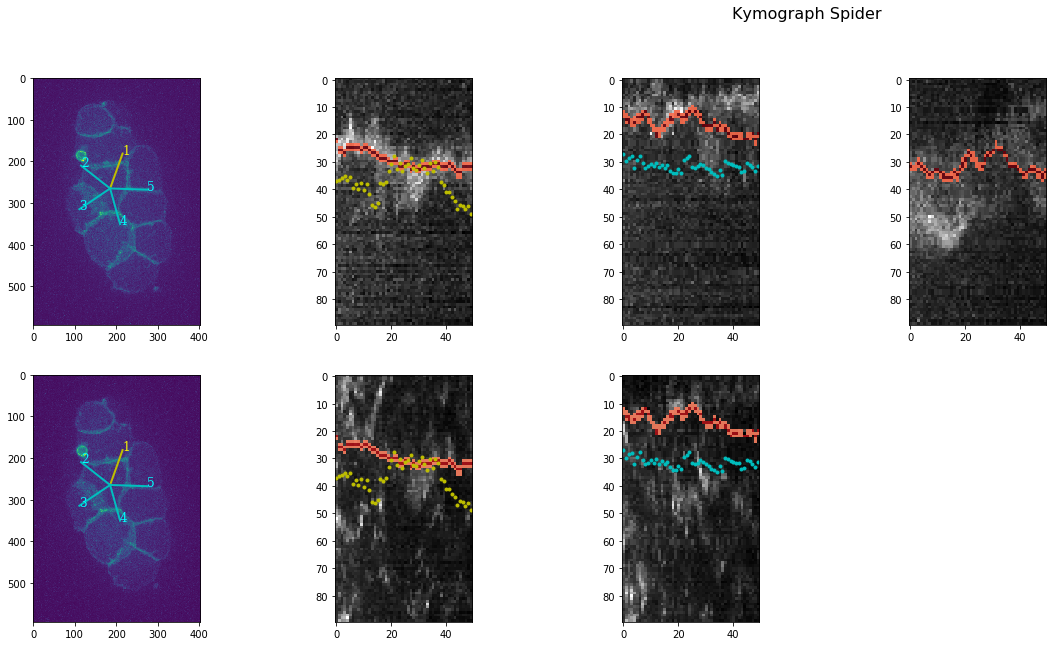

In [18]:
ks.compute(stack[1],stack[0],seg,flow)

# Plotting from here on...
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig = plt.figure()
ks.plot(fig,stack[1][0],stack[1][1],15,True)

# Use the next line if you want to save the plot to disc
#fig.savefig('/Users/jug/Desktop/muh.png')

### Plotting column flow stats

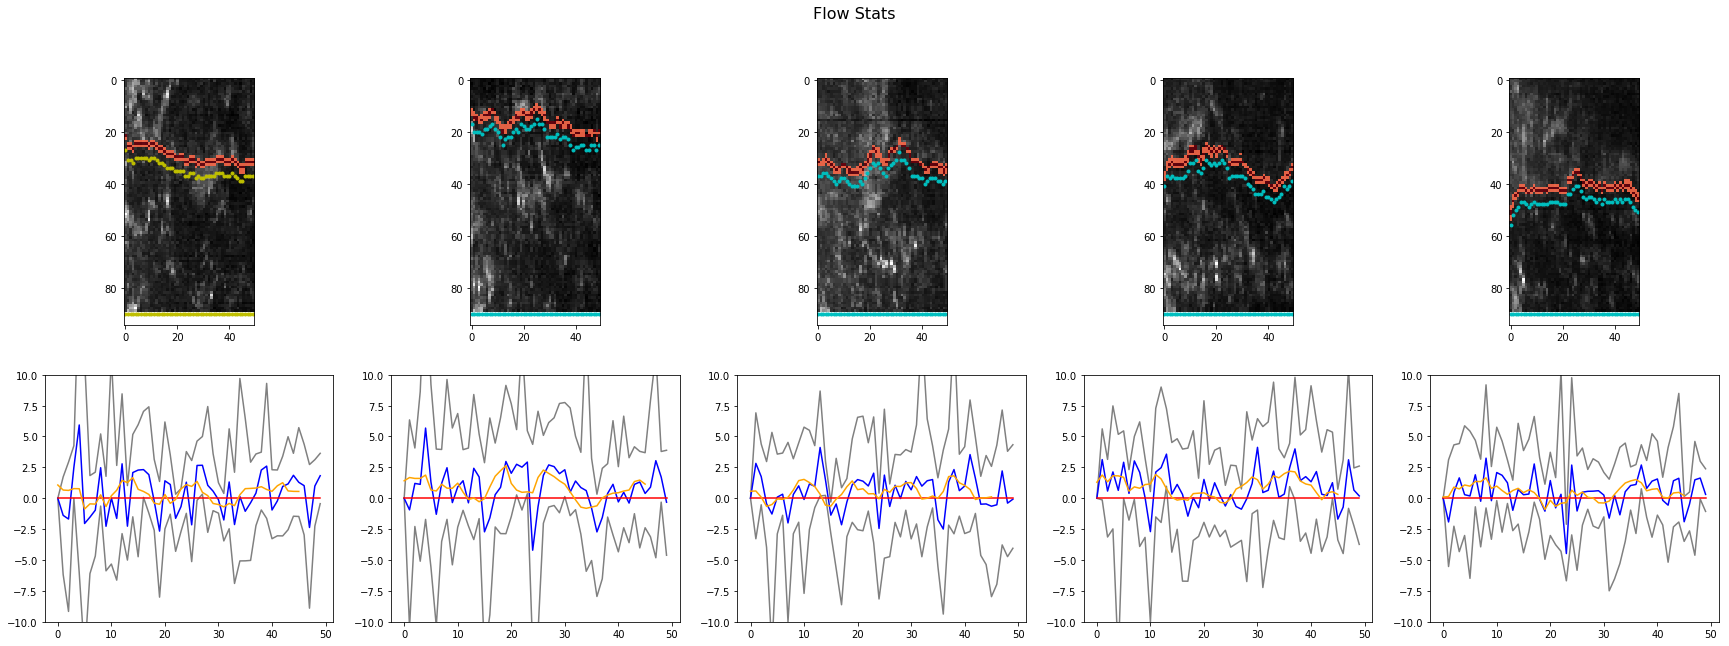

In [19]:
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig_stats = plt.figure()
ks.plot_column_flow_stats(fig_stats, offset_from_membrane=5, length=None)

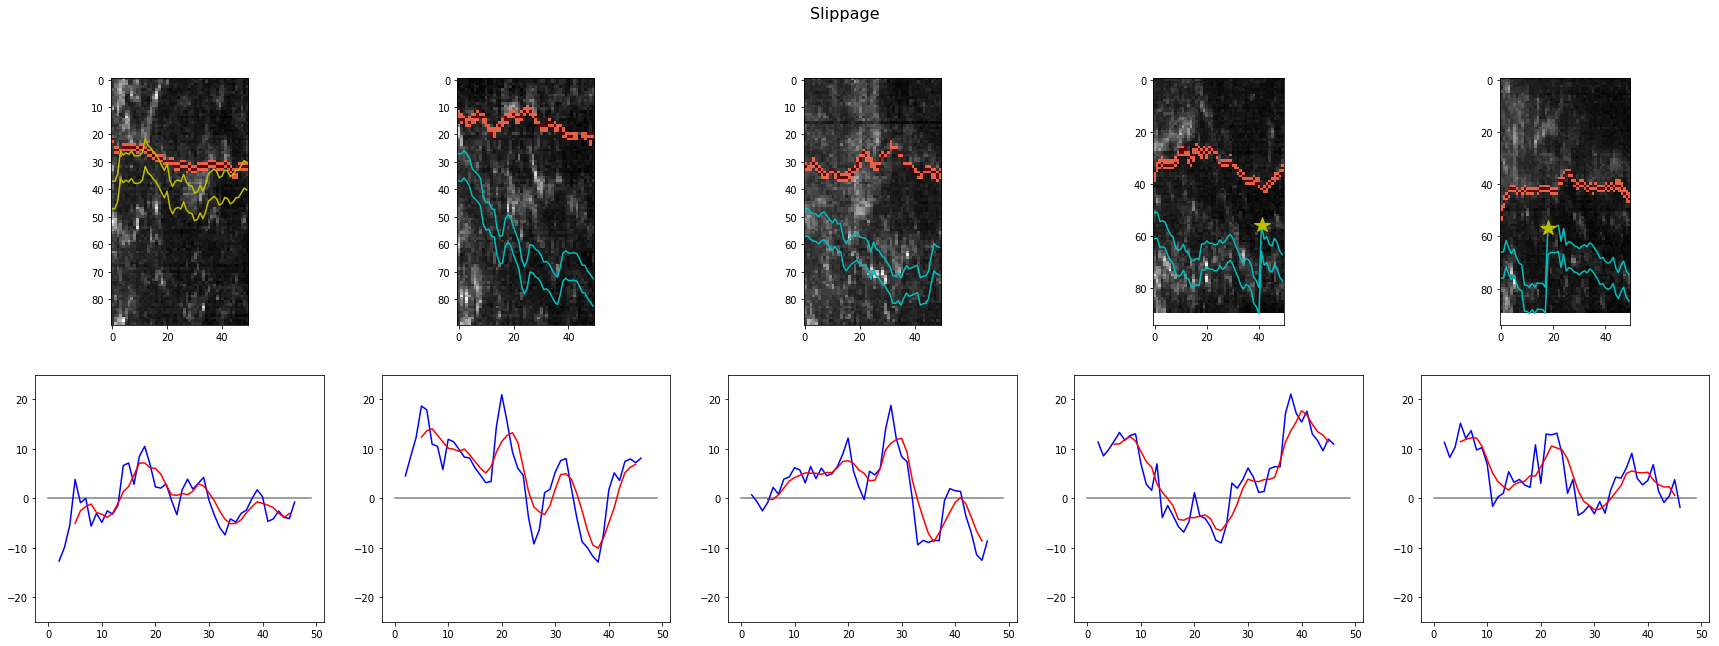

In [20]:
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig_slip = plt.figure()
(s, ss) = ks.plot_slippage(fig_slip, delta_t=5, offset_from_membrane=15, length=10, move_window=True, smoothing_width=5)

In [21]:
# get the y-values of the k-th legs blue line
k=0
s[k][1]

array([-12.72323082,  -9.99333134,  -5.51244602,   3.7921862 ,
        -0.90079552,  -0.0522754 ,  -5.63916656,  -3.06451906,
        -4.88398955,  -2.55716821,  -3.20102119,  -1.45790144,
         6.61693118,   7.14114983,   2.82351623,   8.47320575,
        10.49183305,   6.82709294,   2.3026971 ,   2.05106517,
         2.88299232,  -0.3882083 ,  -3.31748385,   1.70940951,
         3.85135852,   1.84312336,   3.02352374,   4.23454291,
        -0.38320492,  -3.39946178,  -5.90542618,  -7.4175049 ,
        -4.17089732,  -4.82058296,  -3.0797684 ,  -2.38021034,
        -0.15457289,   1.70630987,   0.32698622,  -4.68383008,
        -4.19431219,  -2.58393478,  -3.83060307,  -4.11721073,  -0.7580098 ])

# Export data to CSV file

In [22]:
start_time = 0       # absolute time of first frame in minutes
pixel_size = 0.1144  # this is microns per pixel
delta_t = 6.22/60    # minutes per frame

# TODO export also micrometer based outputs

data_filename = folder+'data.jug'
str_now = datetime.datetime.now().strftime("%B %d, %Y at %I:%M%p")

with open(data_filename, "w") as data_file:
    data_file.write("# Exported after processing from folder '%s' on %s\n\n" % (folder,str_now))
    for legnum in range(len(s)):
        data_file.write("legnum, %d\n"%legnum)
        data_file.write("t [pixel], %s\n"%s[legnum][0])
        data_file.write("s [pixel], %s\n"%s[legnum][1])        
        data_file.write("t [min], %s\n"%s[legnum][0]) TODO (note: absolute time!!!)
        data_file.write("s [um/min], %s\n"%s[legnum][1]) TODO 

SyntaxError: invalid syntax (<ipython-input-22-bfa6812a289c>, line 16)